This is a text classifier transfer learning model trained from fastAI's NLP deep learning AI
Directory before change
Inference.ipynb
__pycache__
model-training-1.ipynb
models
project-initialization.ipynb
sample_submission.csv
test.csv
train.csv
utils.py




  0%|          | 0.00/593k [00:00<?, ?B/s]
100%|##########| 593k/593k [00:00<00:00, 11.5MB/s]


Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
Directory after change
Inference.ipynb
__pycache__
model-training-1.ipynb
models
project-initialization.ipynb
sample_submission.csv
test.csv
train.csv
utils.py


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


Check for any NaN's in data set


text      0
target    0
dtype: int64

Clean up @'s and #'s
clean up tweet data using predefined tweet_cleaning function in utils.py


,text,target
0,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1
...,...,...
7608,Two giant cranes holding a bridge collapse into nearby homes,1
7609,_ahrary The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


Repeat data cleaning with test_df
Check for any NaN's in data set


text    0
dtype: int64

Clean up @'s and #'s
clean up tweet data using predefined tweet_cleaning function in utils.py


,text
0,Just happened a terrible car crash
1,"Heard about earthquake is different cities, stay safe everyone."
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,Apocalypse lighting. Spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn
3259,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power
3260,Green Line derailment in Chicago
3261,MEG issues Hazardous Weather Outlook (HWO)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck
The text data has been vectorized in a format that fastai can use to transfer learn it's NLP AI.
below is an example of the vectorized text data


,text,category
0,xxbos _ \n▁ xxrep 5 ? xxup retweet \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup follow xxup all xxup who xxup rt \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup xxunk \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup gain xxup with \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup follow ? xxup xxunk \n xxup ty,0
1,xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0
2,xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
3,xxbos i xxmaj hate xxmaj to xxmaj talking xxmaj xxunk xxmaj with xxmaj my xxmaj xxunk … i xxmaj mean i xxmaj love xxmaj her xxmaj as xxmaj to xxmaj death xxmaj but xxmaj she xxmaj talk xxmaj so xxmaj damn xxmaj much xxmaj xxunk xxrep 3 h xxrep 3 e xxunk xxrep 3 ! xxrep 6 ?,0
4,xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : xxunk \n\n xxmaj indian xxmaj army xxunk _,0
5,xxbos i xxup hate xxup when xxup i m xxup trying xxup to xxup xxunk xxup my xxup hair xxup and xxup my xxup brother xxup comes xxup xxunk xxup in xxup behind xxup me xxup and xxup xxunk xxup me i xxup just xxup burned xxup my xxup finger,0
6,xxbos ' so again make sure to evacuate past the fire doors . xxmaj any questions ? xxmaj yes ? ' \n ' why would we open the doors to the fire ! ! ? ! ? ? ! ? ' \n\n i … i .. i ca nt,0
7,xxbos xxmaj haha xxmaj south xxmaj tampa is getting flooded xxunk xxup wait a xxup second i xxup live xxup in xxup south xxup tampa xxup what xxup am i xxup gon na xxup do xxup what xxup am i xxup gon na xxup do xxup xxunk flooding,1
8,xxbos xxmaj moved on to ' bang xxmaj bang xxmaj rock and xxmaj roll ' by _ xxunk _ . xxmaj it 's been too long since xxmaj i 've played this one loud . xxup art xxup xxunk xxup top xxup of xxup the xxup xxunk .,0


model_1 has been trained using the vectorizied data
use fastai tool to find good lr


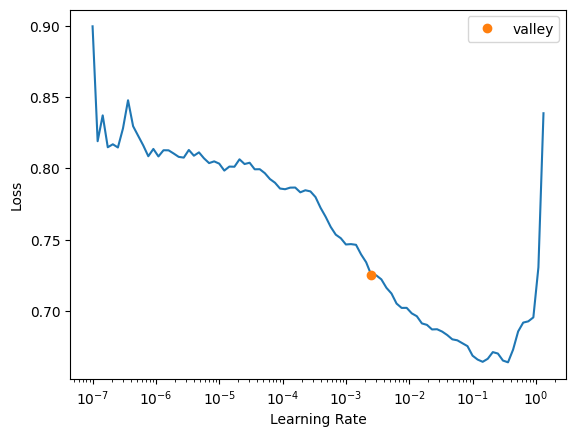

epoch,train_loss,valid_loss,accuracy,time
0,0.585050,0.514030,0.761498,01:32


epoch,train_loss,valid_loss,accuracy,time
0,0.526368,0.493206,0.776610,04:03
1,0.491995,0.462010,0.793693,04:01
2,0.456710,0.454454,0.800263,03:59


model_1 loss plot


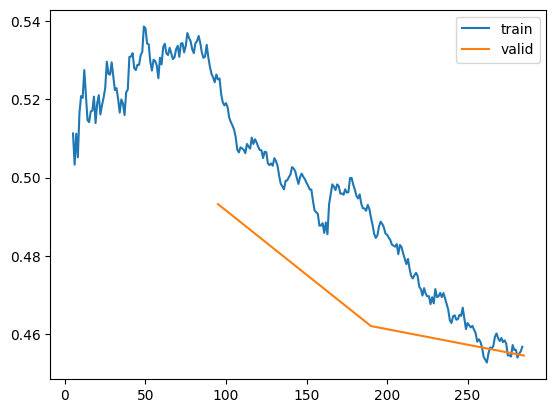

In [1]:
%run model-training-1.ipynb

In [2]:
def change_df(df, learn):
    def change_df_inner(itwt):
        index, twt = itwt
        df[TARGET][index] = int(learn.predict(twt)[0])
    return change_df_inner
    
_ = list(map(change_df(sub_df, model_1), enumerate(test_df[TEXT])))

In [3]:
sub_df.head(20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0


In [4]:
sub_df.to_csv(SUBMISSION, index = False)